In [1]:
from data_processing import Lang,prepareData

t=prepareData()

cpu
Reading lines...
Read 65528 sentence pairs
Trimmed to 65526 sentence pairs
Counting words...
Counted words:
zh 25056
en 13673


In [2]:
input_lang, output_lang, pairs=t[:3]

In [3]:
from evaluate import *

In [7]:
import matplotlib.pyplot as plt

In [4]:
from config import *

In [5]:
MODEL_PATH='./model/model'

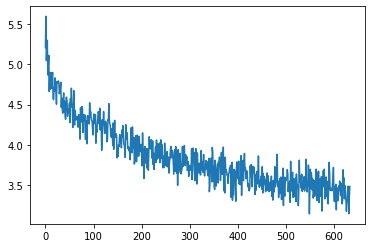

In [8]:
# if __name__=='__main__':
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
encoder1_sd=torch.load(MODEL_PATH+'/encoder1.pt', map_location='cpu')
encoder1.load_state_dict(encoder1_sd)

attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)
attn_decoder1_sd=torch.load(MODEL_PATH+'/attn_decoder1.pt', map_location='cpu')
attn_decoder1.load_state_dict(attn_decoder1_sd)
# trainIters(encoder1, attn_decoder1, 75000, print_every=5000)
plot_losses=torch.load(MODEL_PATH+'/plot_losses.pt', map_location='cpu')
plt.plot(plot_losses)
plt.savefig('loss_v1_0_1.jpg',dpi=400)

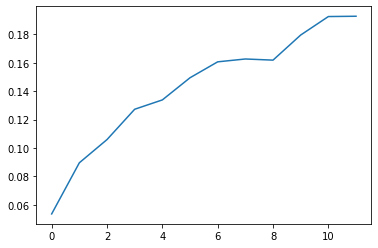

In [53]:
b=torch.load(MODEL_PATH+'/bleu.pt')
plt.plot(b)
plt.savefig('bleu.jpg',dpi=400)

In [11]:
p,b=evaluate_bleu(input_lang,output_lang,pairs,encoder1,attn_decoder1,type='test')

In [12]:
t=torch.tensor(b)

In [15]:
t.sort(descending=True)

torch.return_types.sort(
values=tensor([1., 1., 1.,  ..., 0., 0., 0.]),
indices=tensor([ 964,  976,  807,  ...,  316, 1006,  465]))

In [24]:
with open('bleu_test.pt','wb') as f:
    torch.save(t,f)

In [26]:
import seaborn as sns

/home/qwq/miniconda3/envs/nlp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


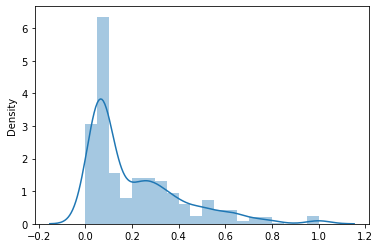

In [39]:
ax=sns.distplot(t)
plt.savefig('t.jpg',dpi=400)

In [46]:
index=range(0,t.size(0))

In [48]:
i=torch.tensor(index)

In [67]:
with open('p_full.txt','w') as f:
    for ii in index:
        p_s=p[ii]
        f.write(f"zh < {p_s[0]}\nen = {p_s[1]}\nmodel > {p_s[2]}\nbleu = {t[ii]}\n\n")

In [66]:
with open('p.txt','w') as f:
    for ii in i[t>0.5]:
        p_s=p[ii]
        f.write(f"zh < {p_s[0]}\nen = {p_s[1]}\nmodel > {p_s[2]}\nbleu = {t[ii]}\n\n")

In [13]:
t.mean()

tensor(0.2104)

In [14]:
p[:10]

[('做 一些 工作 不会 让 你 死 。',
  'doing some work won t kill you .',
  'you can to you to you to'),
 ('他们 有 思考 和 说话 的 能力 。',
  'they can think and speak .',
  'they have to to of and . .'),
 ('他 总会 有 疏漏 的 。', 'he ll get sloppy .', 'he has a in in . .'),
 ('这 是不是 意味着 你 不会 来 了 ？',
  'does that mean you won t come ?',
  'will you come this this ? ?'),
 ('试试 这个 。', 'try this .', 'this is is .'),
 ('我家 后面 有条 胡同 。',
  'there s an alley behind my house .',
  'my house is in the in the . .'),
 ('她 把 房间 里 的 窗子 全都 关上 了 。',
  'she closed all the windows in the room .',
  'she put the of of of of in the'),
 ('这个 酒店 没有 游泳池 。',
  'this hotel doesn t have a swimming pool .',
  'this is is t to . .'),
 ('我 是 游泳 俱乐部 的 会员 。',
  'i m a member of the swimming club .',
  'i m a in a . . .'),
 ('我们 测量 了 这 条河 的 深度 。',
  'we measured the depth of the river .',
  'we found the the of the .')]

In [9]:
def translate(cn_sentence):
    cn_cut=' '.join(jieba.cut(cn_sentence))
    print(cn_cut)
    en_cut=evaluate(input_lang, output_lang, pairs,encoder1, attn_decoder1, cn_cut)[0]
    return ' '.join(en_cut)

In [11]:
translate('汤姆在学校里不专心')

汤姆 在 学校 里 不 专心


'Tom is not at school at school . <EOS>'